In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install patchify

In [3]:
import os
import cv2
import numpy as np
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
#import segmentation_models as sm
#from tensorflow.keras.metrics import MeanIoU

from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmaxscaler = MinMaxScaler()

In [4]:
#root_directory = "/content/drive/My Drive/Colab Notebooks/datasets/"

In [5]:
#patch_size = 256

In [6]:
#image_dataset = []
#for path, subdirs, files in os.walk(root_directory):
#    #print(path)
#    dirname = path.split(os.path.sep)[-1]
#    if dirname == 'images':   #Find all 'images' directories
#        images = os.listdir(path)  #List of all image names in this subdirectory
#        for i, image_name in enumerate(images):
#            if image_name.endswith(".jpg"):   #Only read jpg images...
#
#                image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
#                SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
#                SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
#                image = Image.fromarray(image)
#                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
#                #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
#                image = np.array(image)
#                #Extract patches from each image
#                print("Now patchifying image:", path+"/"+image_name)
#                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
#
#                for i in range(patches_img.shape[0]):
#                    for j in range(patches_img.shape[1]):
#
#                        single_patch_img = patches_img[i,j,:,:]
#
#                        #Use minmaxscaler instead of just dividing by 255.
#                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
#
#                        #single_patch_img = (single_patch_img.astype('float32')) / 255.
#                        single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.
#                        image_dataset.append(single_patch_img)

In [7]:
#mask_dataset = []
#for path, subdirs, files in os.walk(root_directory):
#    #print(path)
#    dirname = path.split(os.path.sep)[-1]
#    if dirname == 'masks':   #Find all 'images' directories
#        masks = os.listdir(path)  #List of all image names in this subdirectory
#        for i, mask_name in enumerate(masks):
#            if mask_name.endswith(".png"):   #Only read png images... (masks in this dataset)
#
#                mask = cv2.imread(path+"/"+mask_name, 1)  #Read each image as Grey (or color but remember to map each color to an integer)
#                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
#                SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
#                SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
#                mask = Image.fromarray(mask)
#                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
#                #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
#                mask = np.array(mask)
#
#                #Extract patches from each image
#                print("Now patchifying mask:", path+"/"+mask_name)
#                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
#
#                for i in range(patches_mask.shape[0]):
#                    for j in range(patches_mask.shape[1]):
#                       single_patch_mask = patches_mask[i,j,:,:]
#                        #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
#                        single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.
#                        mask_dataset.append(single_patch_mask)

In [8]:
dataset_root_folder = "/content/drive/My Drive/Colab Notebooks/datasets/"

In [9]:
for path, subdirs, files in os.walk(dataset_root_folder):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    #print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith(".jpg")):
        #print(image_name)
        a = True

In [10]:
image_patch_size = 256

In [11]:
image = cv2.imread(f'{dataset_root_folder}/images/10.jpg', 1)

In [12]:
image.shape

(2160, 2132, 3)

In [13]:
(image.shape[0] // image_patch_size) *image_patch_size

2048

In [14]:
print(type(image))

<class 'numpy.ndarray'>


In [15]:
type(Image.fromarray(image))

PIL.Image.Image

In [16]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [17]:
len(image_patches)

8

In [18]:
print(image_patches.shape)

(8, 8, 1, 256, 256, 3)


In [19]:
image_x = image_patches[0, 0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [20]:
image_y[0].shape

(256, 256, 3)

### Read and processing satellite images

In [21]:
image_dataset = []

image_extension = 'jpg' #jpg
image_type = 'images'    #images
for image_id in range(10, 20):
  image = cv2.imread(f'{dataset_root_folder}/{image_type}/{image_id}.{image_extension}', 1)
  if image is not None:
    #print(image.shape)
    size_x = (image.shape[1] // image_patch_size) *image_patch_size
    size_y = (image.shape[0] // image_patch_size) *image_patch_size
    #print('{} --- {} - {}'.format(image.shape, size_x, size_y))
    image = Image.fromarray(image)
    image = image.crop((0, 0, size_x, size_y))
    #print('{}, {}'.format(image.size[0], image.size[1]))
    image = np.array(image)
    patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
    #print(len(patched_images))
    for i in range(patched_images.shape[0]):
      for j in range(patched_images.shape[1]):
        individual_patched_image = patched_images[i,j,:,:]
        #print(individual_patched_image.shape)
        individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
        individual_patched_image = individual_patched_image[0]
        #print(individual_patched_image.shape)
        image_dataset.append(individual_patched_image)


In [22]:
len(image_dataset)

632

### processing mask images

In [23]:
mask_dataset = []

image_extension = 'png'
image_type = 'masks'    #images
for image_id in range(10, 20):
  image = cv2.imread(f'{dataset_root_folder}/{image_type}/{image_id}.{image_extension}', 1)
  if image is not None:
    #print(image.shape)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    size_x = (image.shape[1] // image_patch_size) *image_patch_size
    size_y = (image.shape[0] // image_patch_size) *image_patch_size
    #print('{} --- {} - {}'.format(image.shape, size_x, size_y))
    image = Image.fromarray(image)
    image = image.crop((0, 0, size_x, size_y))
    #print('{}, {}'.format(image.size[0], image.size[1]))
    image = np.array(image)
    patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
    #print(len(patched_images))
    for i in range(patched_images.shape[0]):
      for j in range(patched_images.shape[1]):
        individual_patched_mask = patched_images[i,j,:,:]
        #print(individual_patched_image.shape)
        #individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
        individual_patched_mask = individual_patched_mask[0]
        #print(individual_patched_image.shape)
        mask_dataset.append(individual_patched_mask)


In [24]:
len(mask_dataset)

632

In [25]:
image1 = image_dataset[0]

In [26]:
image1[0][0][0]

0.4503311258278146

In [27]:
mask1 = mask_dataset[0]

In [28]:
mask_dataset[0]

array([[[ 68,   1,  84],
        [ 68,   1,  84],
        [ 68,   1,  84],
        ...,
        [ 68,   1,  84],
        [ 68,   1,  84],
        [ 68,   1,  84]],

       [[ 68,   1,  84],
        [ 68,   1,  84],
        [ 68,   1,  84],
        ...,
        [ 68,   1,  84],
        [ 68,   1,  84],
        [ 68,   1,  84]],

       [[ 68,   1,  84],
        [ 68,   1,  84],
        [ 68,   1,  84],
        ...,
        [ 68,   1,  84],
        [ 68,   1,  84],
        [ 68,   1,  84]],

       ...,

       [[ 68,   1,  84],
        [ 68,   1,  84],
        [ 68,   1,  84],
        ...,
        [253, 231,  36],
        [253, 231,  36],
        [253, 231,  36]],

       [[ 68,   1,  84],
        [ 68,   1,  84],
        [ 68,   1,  84],
        ...,
        [253, 231,  36],
        [253, 231,  36],
        [253, 231,  36]],

       [[ 68,   1,  84],
        [ 68,   1,  84],
        [ 68,   1,  84],
        ...,
        [253, 231,  36],
        [253, 231,  36],
        [253, 231,  36]]

In [29]:
mask1[0][0][0]

68

In [30]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [31]:
print(image_dataset.shape)
print(mask_dataset.shape)

(632, 256, 256, 3)
(632, 256, 256, 3)


In [32]:
image_dataset[0][0][0][0]

0.4503311258278146

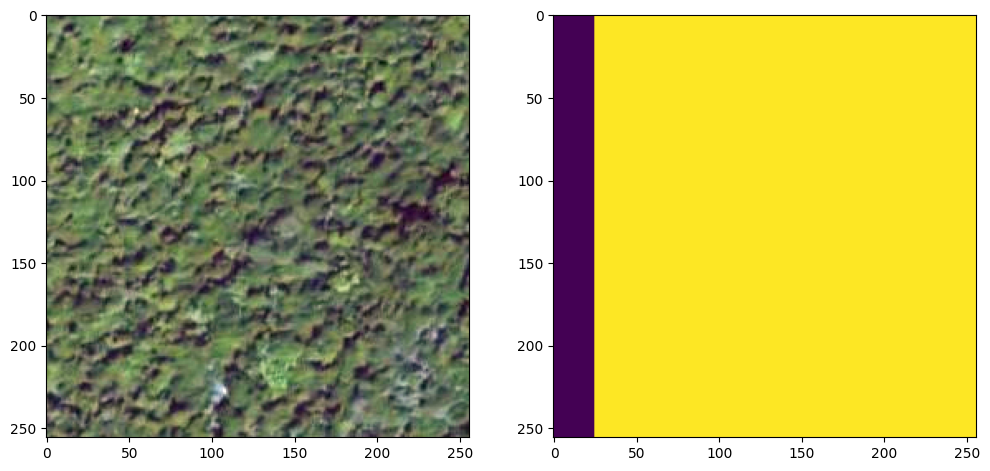

In [33]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_dataset[image_number])
plt.show()

### Processing mask image labels

In [34]:
#a=int('3C', 16)  #3C with base 16. Should return 60.
#print(a)
#Do the same for all RGB channels in each hex code to convert to RGB
tree = '#440154'.lstrip('#')
tree = np.array(tuple(int(tree[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

non_tree = '#fde724'.lstrip('#')
non_tree = np.array(tuple(int(non_tree[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

print(tree)
print(non_tree)


[68  1 84]
[253 231  36]


In [35]:
print(type(individual_patched_mask))
label = individual_patched_mask
print(type(label))
print(label.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(256, 256, 3)


In [36]:
#label[0][0][0]

In [37]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape,dtype=np.uint8)
    label_segment [np.all(label == tree,axis=-1)] = 0
    label_segment [np.all(label==non_tree,axis=-1)] = 1
    label_segment = label_segment[:,:,0]
    return label_segment

In [38]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)

In [39]:
print(type(labels))
print(len(labels))
print(labels[1].shape)

<class 'list'>
632
(256, 256)


In [40]:
labels = np.array(labels)

In [41]:
print(labels.shape)

(632, 256, 256)


In [42]:
labels[3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [43]:
labels = np.expand_dims(labels, axis=3)


In [44]:
print(labels.shape)

(632, 256, 256, 1)


In [45]:
labels[0]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [46]:
np.unique(labels)

array([0, 1], dtype=uint8)

In [47]:
labels[0][:,:,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

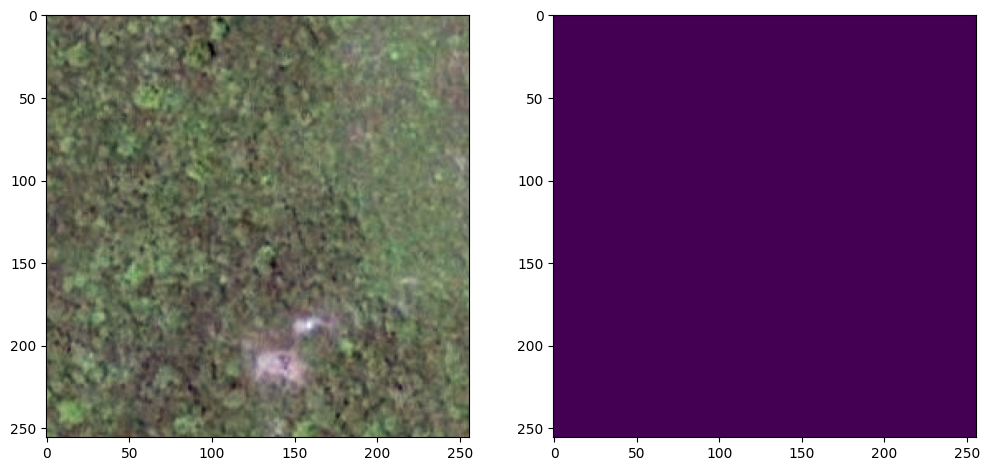

In [48]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
#plt.imshow(mask_dataset[image_number])
plt.imshow(labels[image_number][:,:,0])
#plt.show()

### Training and Test split

In [49]:
total_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_categorical_dataset, test_size = 0.15, random_state = 42)

In [50]:
print(X_train[0])

[[[0.72781065 0.70658683 0.75586854]
  [0.73372781 0.70658683 0.75586854]
  [0.76923077 0.74251497 0.78403756]
  ...
  [0.70414201 0.66467066 0.74178404]
  [0.69822485 0.65868263 0.7370892 ]
  [0.68047337 0.64071856 0.72300469]]

 [[0.74556213 0.7245509  0.76995305]
  [0.74556213 0.71856287 0.76525822]
  [0.77514793 0.74850299 0.78873239]
  ...
  [0.64497041 0.60479042 0.69483568]
  [0.66272189 0.62275449 0.70892019]
  [0.66272189 0.62275449 0.70892019]]

 [[0.75147929 0.73053892 0.77464789]
  [0.73964497 0.71856287 0.76525822]
  [0.75739645 0.73652695 0.77934272]
  ...
  [0.59763314 0.56886228 0.66197183]
  [0.64497041 0.60479042 0.69483568]
  [0.66863905 0.62874251 0.71361502]]

 ...

 [[0.34911243 0.32934132 0.14553991]
  [0.33136095 0.31137725 0.1314554 ]
  [0.32544379 0.2994012  0.13615023]
  ...
  [0.73372781 0.73652695 0.78403756]
  [0.75739645 0.76047904 0.8028169 ]
  [0.79881657 0.80239521 0.83568075]]

 [[0.37869822 0.34730539 0.15492958]
  [0.34319527 0.31137725 0.12676056]


In [51]:
print(type(X_train))
print(X_train[0][0][0][0])

<class 'numpy.ndarray'>
0.727810650887574


In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 256, 256, 3)
(537, 256, 256, 2)
(95, 256, 256, 3)
(95, 256, 256, 2)


In [53]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

## Deep Learning

In [54]:
!pip install -U segmentation-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.2 MB/s eta 0:00:00


In [55]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [56]:
from keras import backend as K

In [57]:
import tensorflow as tf

In [58]:
tf.keras.backend.clear_session()

In [59]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [60]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
2


In [61]:
def multi_unet_model(n_classes=2, image_height=256, image_width=256, image_channels=1):
  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

  outputs = Conv2D(n_classes, (1,1), activation='softmax')(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model


In [62]:
metrics = ['accuracy', jaccard_coef]

In [63]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
2


In [64]:
def get_deep_learning_model():
  return multi_unet_model(n_classes= total_classes,
                          image_height= image_height ,
                          image_width= image_width,
                          image_channels= image_channels)

In [65]:
model = get_deep_learning_model()

In [66]:
#model.get_config()

In [67]:
weights = [0.5, 0.5]

In [68]:
#import segmentation_models as sm

In [69]:
!pip install -U -q segmentation-models
#!pip install -q tensorflow==2.2.1
#!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [70]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [71]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [72]:
total_loss = dice_loss + (1 * focal_loss)

In [73]:
model.compile(optimizer='adam', loss=total_loss, metrics=metrics)

In [74]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [75]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/100
34/34 [==============================] - 42s 343ms/step - loss: 0.7497 - accuracy: 0.6443 - jaccard_coef: 0.3939 - val_loss: 0.6603 - val_accuracy: 0.8141 - val_jaccard_coef: 0.6391
Epoch 2/100
34/34 [==============================] - 6s 189ms/step - loss: 0.6617 - accuracy: 0.8237 - jaccard_coef: 0.6420 - val_loss: 0.6534 - val_accuracy: 0.8248 - val_jaccard_coef: 0.6267
Epoch 3/100
34/34 [==============================] - 6s 191ms/step - loss: 0.6503 - accuracy: 0.8390 - jaccard_coef: 0.6611 - val_loss: 0.6546 - val_accuracy: 0.8310 - val_jaccard_coef: 0.6180
Epoch 4/100
34/34 [==============================] - 6s 188ms/step - loss: 0.6506 - accuracy: 0.8370 - jaccard_coef: 0.6603 - val_loss: 0.6482 - val_accuracy: 0.8329 - val_jaccard_coef: 0.6292
Epoch 5/100
34/34 [==============================] - 6s 191ms/step - loss: 0.6437 - accuracy: 0.8439 - jaccard_coef: 0.6744 - val_loss: 0.6474 - val_accuracy: 0.8339 - val_jaccard_coef: 0.6214
Epoch 6/100
34/34 [===============

In [76]:
history_a = model_history

In [77]:
history_a.history

{'loss': [0.7496575713157654,
  0.6616841554641724,
  0.6503131985664368,
  0.6506177186965942,
  0.6436717510223389,
  0.6394308805465698,
  0.6364560127258301,
  0.6353325247764587,
  0.631984293460846,
  0.6318056583404541,
  0.6327133774757385,
  0.6297255158424377,
  0.6313800811767578,
  0.6266475319862366,
  0.6282316446304321,
  0.6265085935592651,
  0.6249669194221497,
  0.6235508322715759,
  0.6212591528892517,
  0.6232659816741943,
  0.6216102838516235,
  0.6207062005996704,
  0.6210172176361084,
  0.6156675219535828,
  0.6211562752723694,
  0.6168057322502136,
  0.6148068904876709,
  0.6125675439834595,
  0.6177764534950256,
  0.6111437678337097,
  0.6079453825950623,
  0.6094740629196167,
  0.6031466722488403,
  0.6084312796592712,
  0.6021762490272522,
  0.6010156273841858,
  0.5997262597084045,
  0.6004851460456848,
  0.6060590744018555,
  0.6008346676826477,
  0.5983812212944031,
  0.595170259475708,
  0.5929783582687378,
  0.5899511575698853,
  0.5869625210762024,
  0.

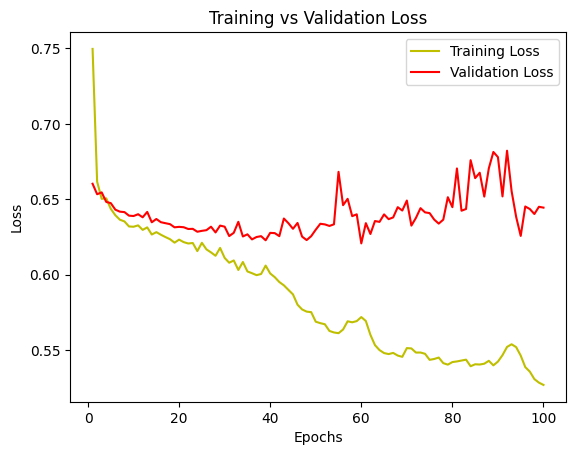

In [78]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

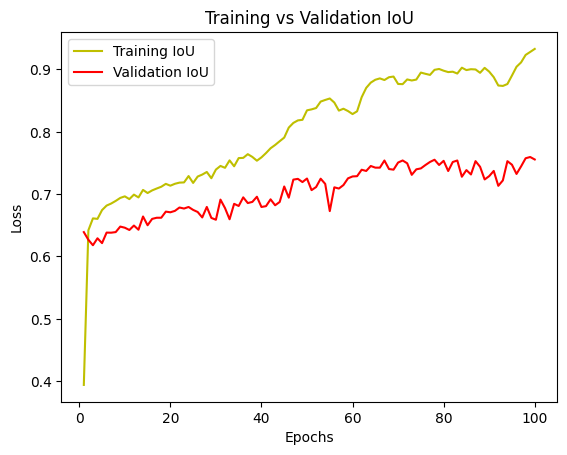

In [79]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, jaccard_coef, 'y', label='Training IoU')
plt.plot(epochs, val_jaccard_coef, 'r', label='Validation IoU')
plt.title('Training vs Validation IoU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 34}

In [81]:
y_pred = model.predict(X_test)

3/3 [==============================] - 6s 1s/step


In [82]:
len(y_pred)

95

In [83]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [84]:
len(y_pred_argmax)

95

In [85]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 

In [86]:
y_test_argmax = np.argmax(y_test, axis=3)

In [87]:
y_test_argmax

array([[[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 

In [120]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0, :, :]

1/1 [==============================] - 0s 23ms/step


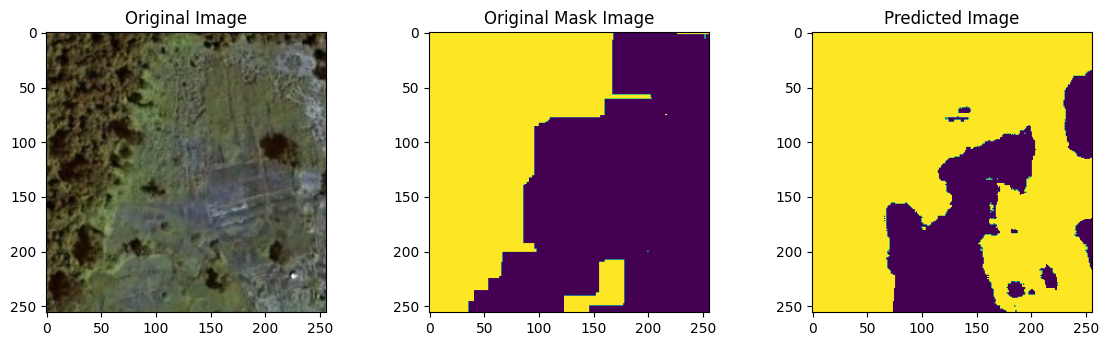

In [121]:
plt.figure(figsize=(14, 8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Mask Image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)